In [1]:
import os
%matplotlib notebook
import matplotlib.pyplot as plt
import torch
import numpy as np
import math
LABELS = ['AdaBelief','SGD']#'Adam', 'AdaBound','SGD','AmsVar','AmsBound','AmsVar4']

params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
         }
         #'axes.legend.fontsize':'medium',}
#plt.rcParams.keys()
plt.rcParams.update(params)

In [2]:

def get_data(names):
    folder_path = './curve'
    paths = [os.path.join(folder_path, name) for name in names]
    return {name: torch.load(fp) for name, fp in zip(names, paths)}

def plot(names, curve_type='train', labels = None, ylim=(30,110)):
    plt.figure()
    plt.ylim(ylim)# if curve_type == 'train' else 96)
    curve_data = get_data(names)
    for i, label in zip(curve_data.keys(),labels):
        acc = np.array(curve_data[i]['{}_loss'.format(curve_type.lower())])
        
        if label == 'AdaBelief':
            plt.plot(acc, '-' ,label = label)
        else:
            plt.plot(acc, '--',label=label)
    
    plt.grid()
    plt.legend(fontsize=14, loc='lower left')
    plt.title('{} set perplexity ~ training epoch'.format(curve_type))
    plt.xlabel('Training Epoch')
    plt.ylabel('Perplexity')


## 1-layer LSTM

<IPython.core.display.Javascript object>


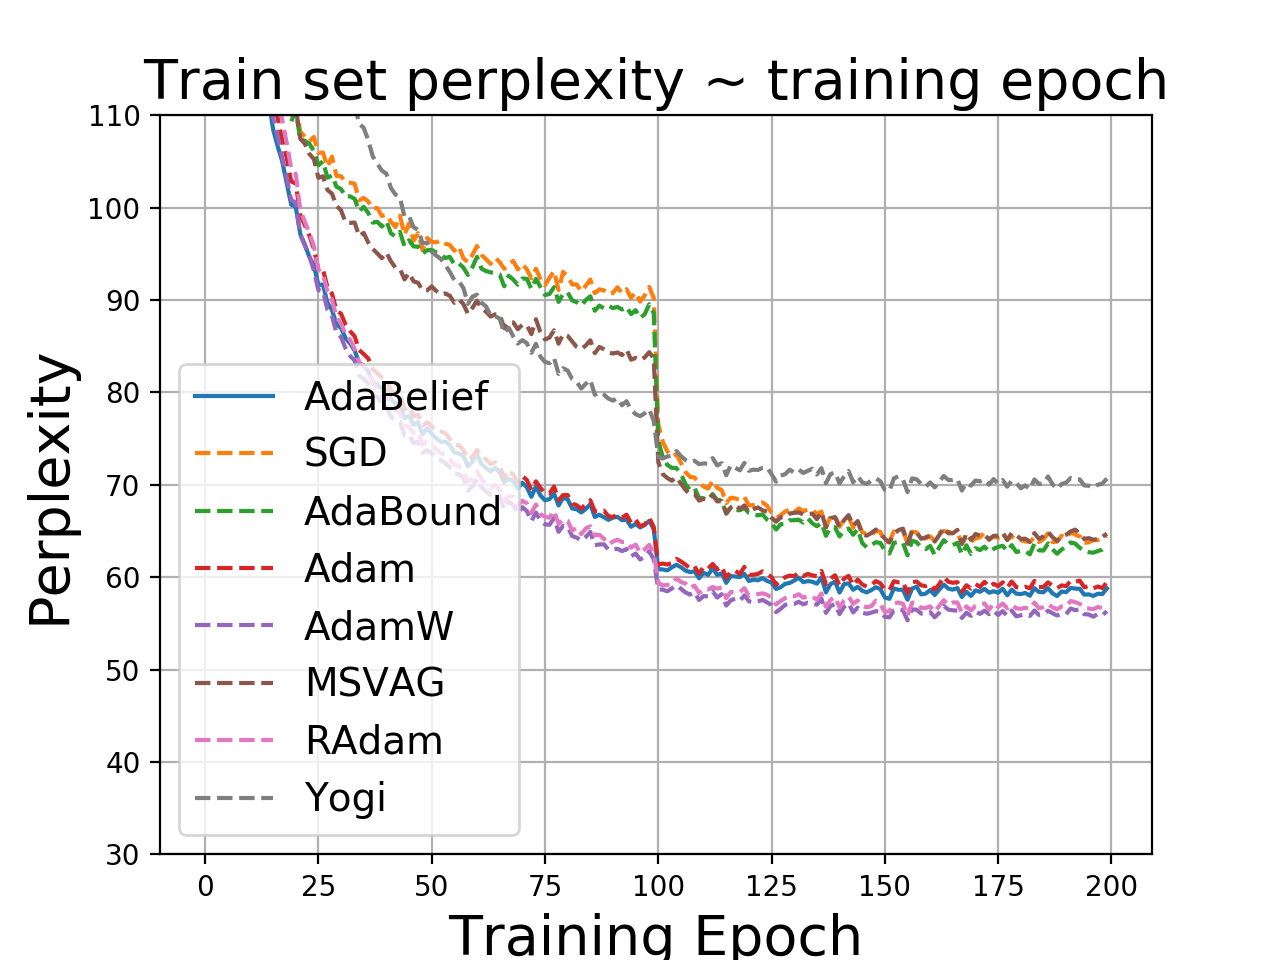

<IPython.core.display.Javascript object>


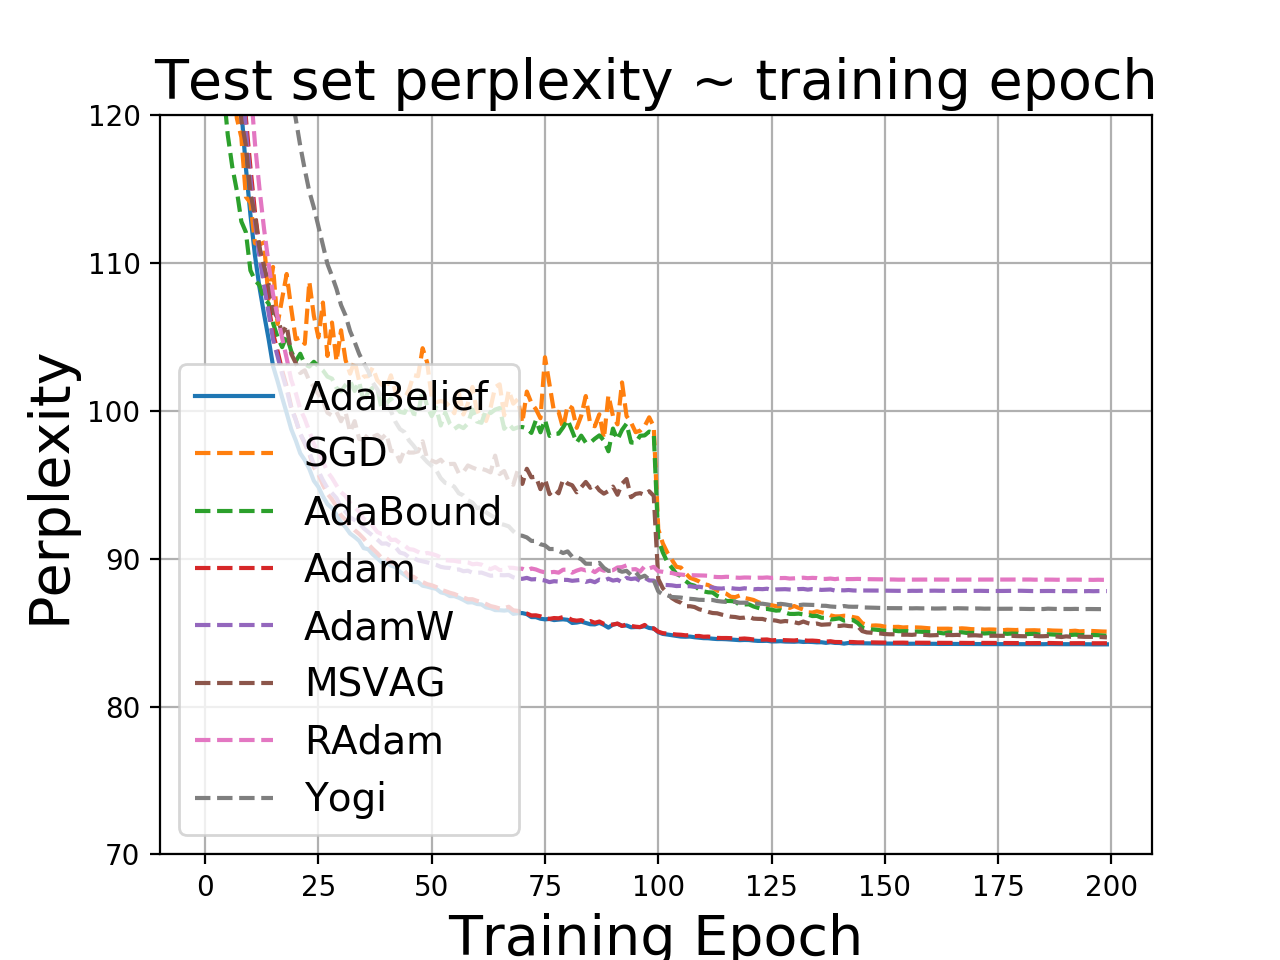

In [3]:
names = [ 'PTB.pt-niter-200-optimizer-adabelief-nlayers1-lr0.001-clip-0.25-eps1e-16-epsqrt0.0-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
         'PTB.pt-niter-200-optimizer-sgd-nlayers1-lr30.0-clip-0.25-eps1e-12-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-adabound-nlayers1-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-adam-nlayers1-lr0.001-clip-0.25-eps1e-12-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-adamw-nlayers1-lr0.001-clip-0.25-eps1e-12-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-msvag-nlayers1-lr30.0-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-radam-nlayers1-lr0.001-clip-0.25-eps1e-12-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-yogi-nlayers1-lr0.01-clip-0.25-eps0.001-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
        ]
labels = ['AdaBelief',
          'SGD',
          'AdaBound',
          'Adam',
          'AdamW',
          'MSVAG',
          'RAdam',
          'Yogi'
        ]
plot(names, 'Train', labels = labels)
plt.savefig('Train_lstm_1layer.png', dpi=600)
plot(names, 'Test', ylim=(70,120), labels = labels)
plt.savefig('Test_lstm_1layer.png', dpi=600)

## 2-layer LSTM

<IPython.core.display.Javascript object>


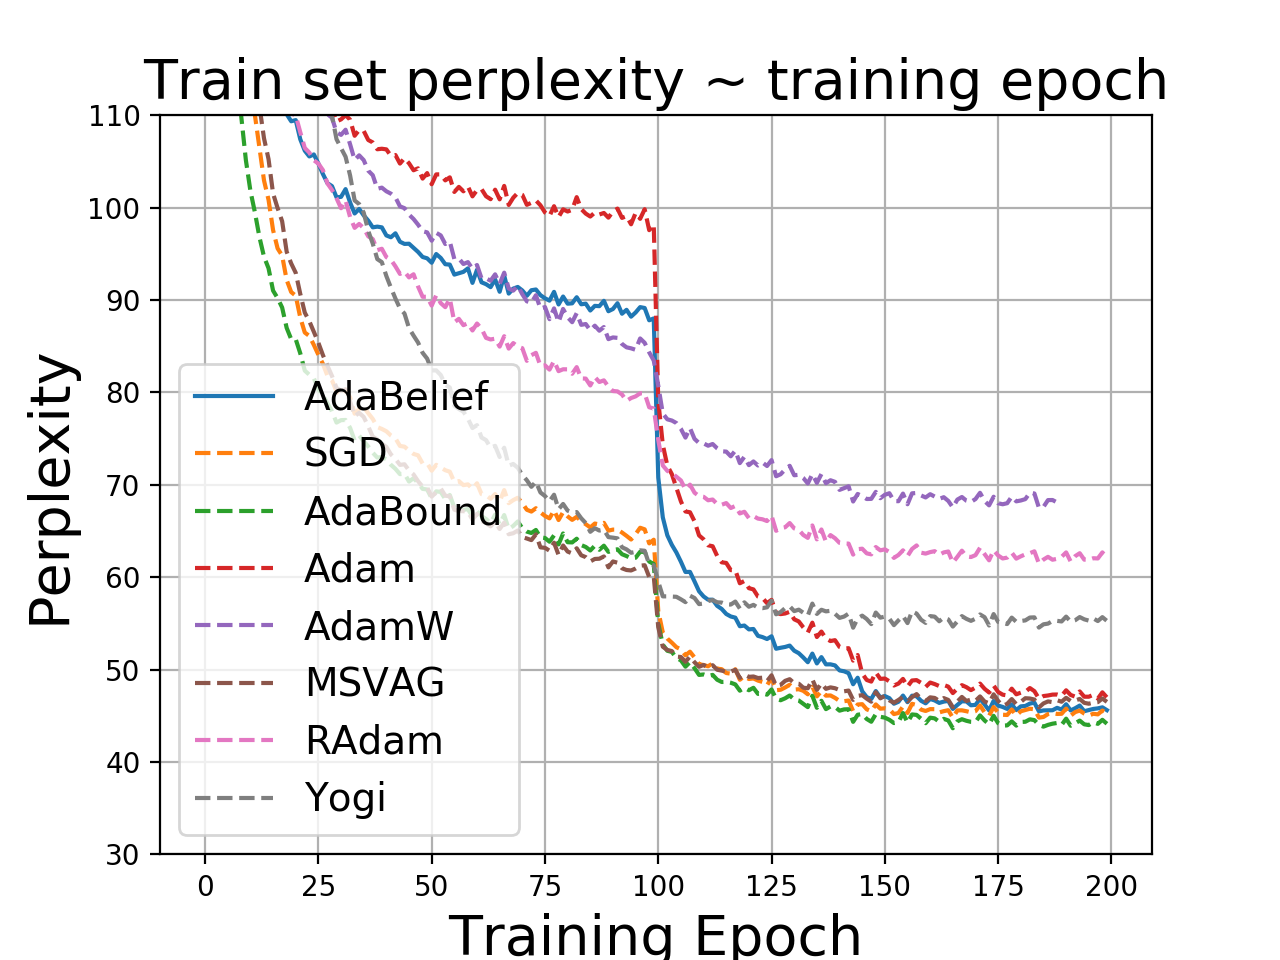

<IPython.core.display.Javascript object>


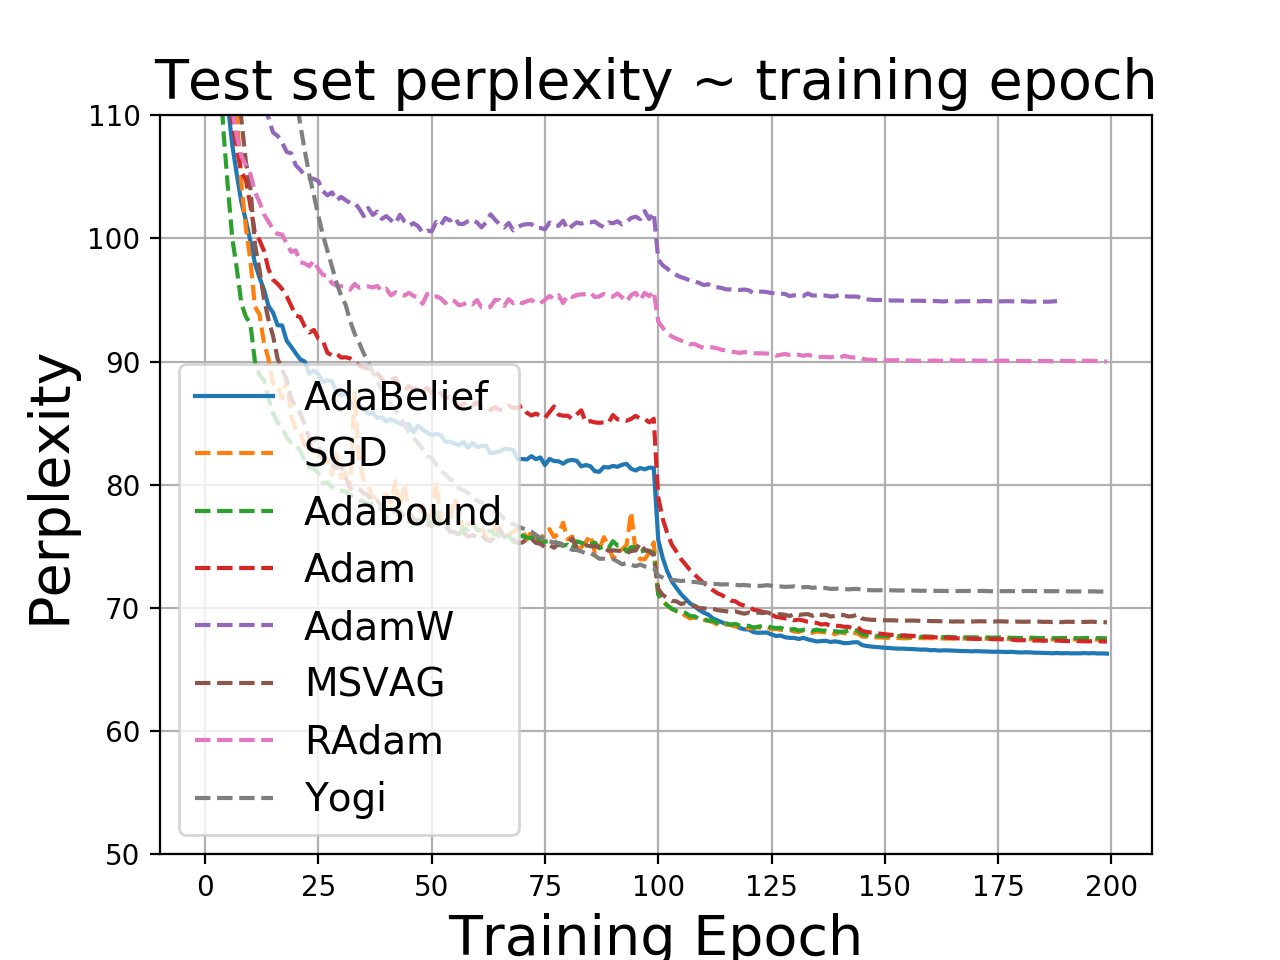

In [4]:
names = [ 'PTB.pt-niter-200-optimizer-adabelief-nlayers2-lr0.01-clip-0.25-eps1e-12-epsqrt0.0-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]', 
          'PTB.pt-niter-200-optimizer-sgd-nlayers2-lr30.0-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
         'PTB.pt-niter-200-optimizer-adabound-nlayers2-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
         'PTB.pt-niter-200-optimizer-adam-nlayers2-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
         'PTB.pt-niter-200-optimizer-adamw-nlayers2-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
         'PTB.pt-niter-200-optimizer-msvag-nlayers2-lr30.0-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
         'PTB.pt-niter-200-optimizer-radam-nlayers2-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
         'PTB.pt-niter-200-optimizer-yogi-nlayers2-lr0.01-clip-0.25-eps0.001-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
        ]
labels = ['AdaBelief',
          'SGD',
          'AdaBound',
          'Adam',
          'AdamW',
          'MSVAG',
          'RAdam',
          'Yogi'
        ]
plot(names, 'Train', labels = labels)
plt.savefig('Train_lstm_1layer.png', dpi=600)
plot(names, 'Test', ylim=(50,110), labels = labels)
plt.savefig('Test_lstm_1layer.png', dpi=600)

## 3-layer LSTM

<IPython.core.display.Javascript object>


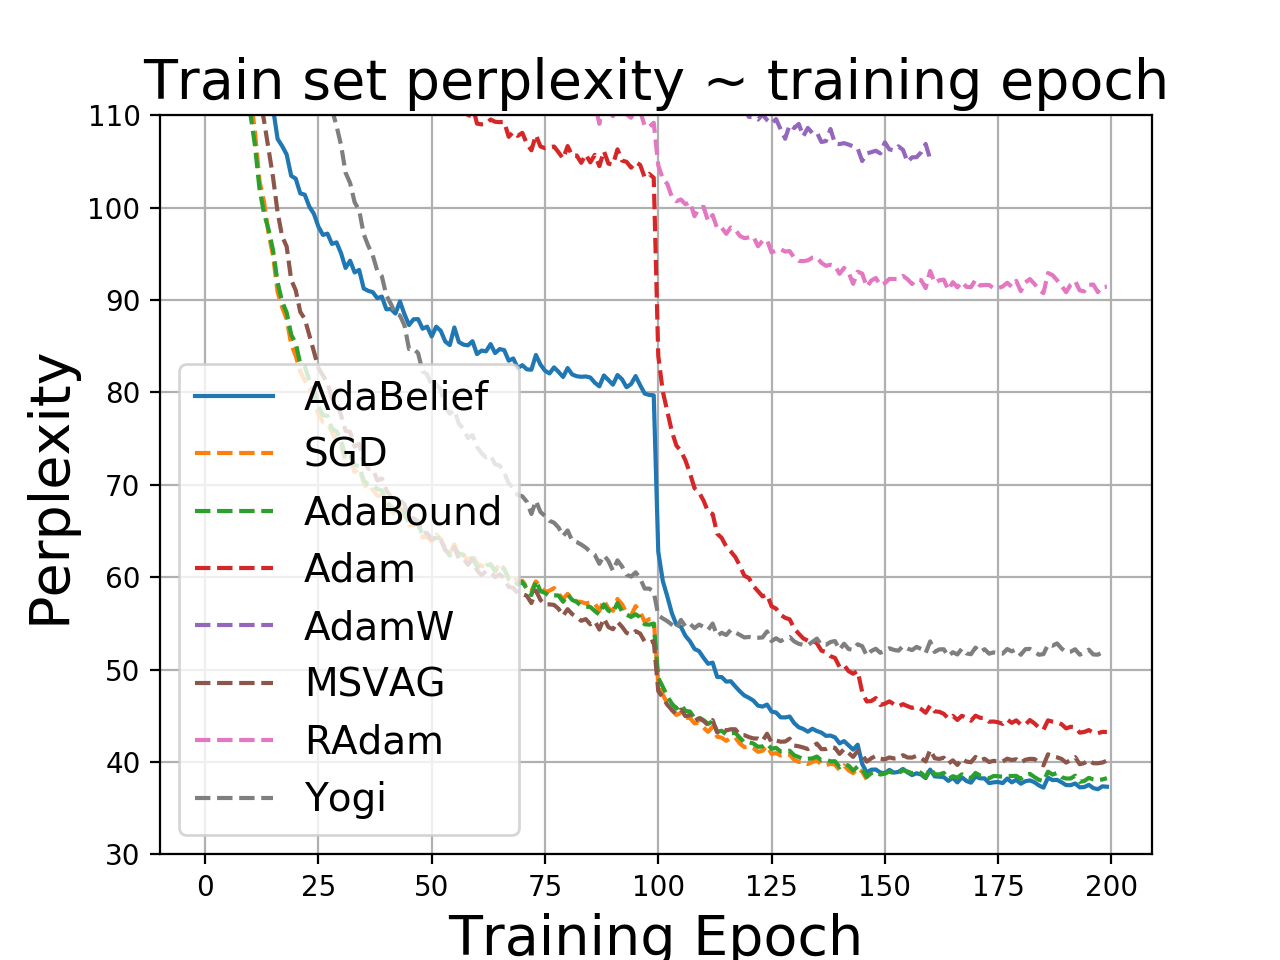

<IPython.core.display.Javascript object>


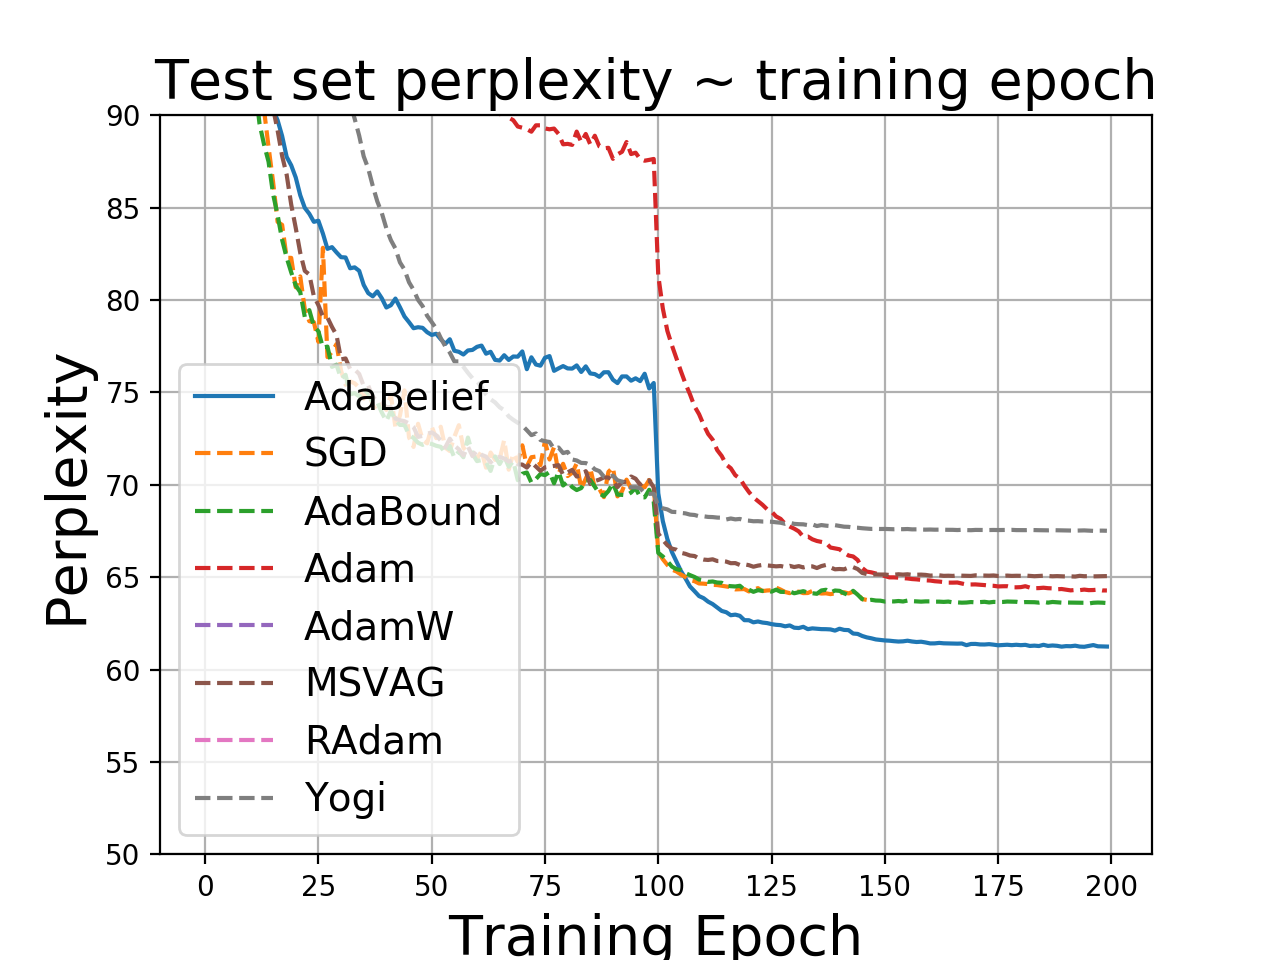

In [5]:
names = [
    'PTB.pt-niter-200-optimizer-adabelief-nlayers3-lr0.01-clip-0.25-eps1e-12-epsqrt0.0-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
    'PTB.pt-niter-200-optimizer-sgd-nlayers3-lr30.0-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
    'PTB.pt-niter-200-optimizer-adabound-nlayers3-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
    'PTB.pt-niter-200-optimizer-adam-nlayers3-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
    'PTB.pt-niter-200-optimizer-adamw-nlayers3-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
    'PTB.pt-niter-200-optimizer-msvag-nlayers3-lr30.0-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
    'PTB.pt-niter-200-optimizer-radam-nlayers3-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
    'PTB.pt-niter-200-optimizer-yogi-nlayers3-lr0.01-clip-0.25-eps0.001-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
    
]
labels = ['AdaBelief',
          'SGD',
          'AdaBound',
          'Adam',
          'AdamW',
          'MSVAG',
          'RAdam',
          'Yogi'
        ]
plot(names, 'Train', labels=labels)
plt.savefig('Train_lstm_3layer.png', dpi=600)
plot(names, 'Test', ylim=(50,90), labels=labels)
plt.savefig('Test_lstm_3layer.png', dpi=600)
